In [ ]:
!pip install torch

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-5 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 200x300 1 zebra
Speed: 7.7ms pre-process, 330.9ms inference, 3.2ms NMS per image at shape (1, 3, 448, 640)


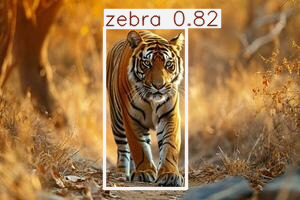

         xmin       ymin        xmax        ymax  confidence  class   name
0  104.720276  27.731831  186.264801  188.181793    0.824678     22  zebra


In [ ]:
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load image
img_path = '/content/WhatsApp Image 2025-06-03 at 12.27.46.jpeg'
img = cv2.imread(img_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(img)

# Print results
results.print()  # Print results to console
results.show()   # Display results

# Get the results
detections = results.pandas().xyxy[0]  # Results as pandas dataframe

# Print detections
print(detections)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


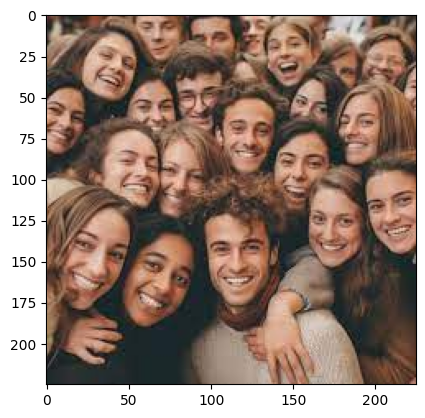

In [ ]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (0, 255, 0), 4)

    return face_img
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtCBiRDNMMhll0Nq9La89dfj20lmsgbhiCHVSm3PmtiWM5Cz4OT2GTgor-EcChrbNDFFg&usqp=CAU'
response = requests.get(url)
image_np = np.frombuffer(response.content, np.uint8)
img = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
# img = cv2.imread('https://i.sstatic.net/kEZHm.jpg')
a=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

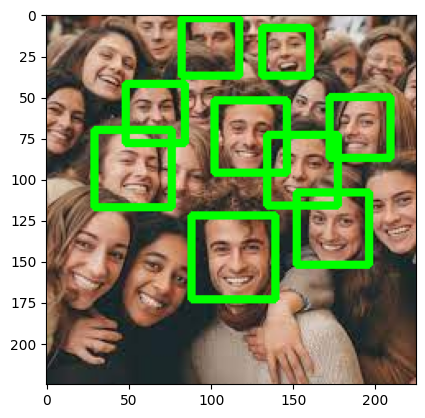

In [ ]:
face = adjusted_detect_face(img)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()

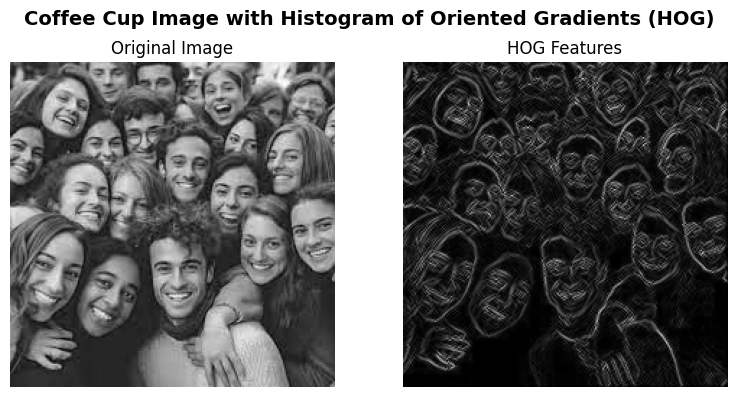

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure,color
image = color.rgb2gray(img)
# Compute HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(1,1), cells_per_block=(1, 1), visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
fig.suptitle('Coffee Cup Image with Histogram of Oriented Gradients (HOG)', fontsize=14, fontweight='bold')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# HOG Features
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
ax2.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the layout to accommodate the title
plt.show()

In [ ]:
from imutils import paths
imagePaths = list(paths.list_images('ckplus/CK+48'))

In [ ]:
imagePaths

[]

First, let's make sure the `kaggle.json` file is in the correct directory and set up the environment variable for the Kaggle API.

In [ ]:
import os

# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json file to the Kaggle configuration directory
# Make sure the filename matches the one you uploaded
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Set the KAGGLE_CONFIG_DIR environment variable
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

Now you can use the Kaggle API to download the dataset.

In [ ]:
# Download the dataset
!kaggle datasets download -d fareselmenshawii/face-detection-dataset

# Unzip the downloaded dataset (assuming it's a zip file)
!unzip face-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: labels2/b0a96b76a58c433c.txt  
  inflating: labels2/b0abd92b73ecb406.txt  
  inflating: labels2/b0b880a17aeb2905.txt  
  inflating: labels2/b0b9a9952976e42b.txt  
  inflating: labels2/b0bfe0f426275870.txt  
  inflating: labels2/b0c2f74e1fed9b71.txt  
  inflating: labels2/b0c4491f61005387.txt  
  inflating: labels2/b0c4ccd19b83f4c6.txt  
  inflating: labels2/b0c66e943f050df1.txt  
  inflating: labels2/b0c9eb2a1f9aa986.txt  
  inflating: labels2/b0cf4af0df03be90.txt  
  inflating: labels2/b0d51a66b2c3abeb.txt  
  inflating: labels2/b0d9501aa2380861.txt  
  inflating: labels2/b0d97c088f04e8b1.txt  
  inflating: labels2/b0d9c679a092d344.txt  
  inflating: labels2/b0e2895cee4857fb.txt  
  inflating: labels2/b0e3b8966b7cefd7.txt  
  inflating: labels2/b0e42c5dfa9a33f6.txt  
  inflating: labels2/b0e5977bf9f93624.txt  
  inflating: labels2/b0ed683107bd066d.txt  
  inflating: labels2/b0ee06c4da776fbb.txt  
  inflating: labels2/b0fd

In [ ]:
import matplotlib.pyplot as plt
import os
from skimage.feature import hog
from skimage import data, exposure, color
from tqdm import tqdm
import random
import cv2 # Import cv2 for resizing

features = []
image_dir = '/content/images/train'
# Get list of image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Calculate the number of images for 20%
num_images_to_process = int(len(image_files) * 1)

# Select a random subset of images
random_image_files = random.sample(image_files, num_images_to_process)

# Define a fixed size for resizing images
fixed_size = (128, 128) # You can adjust this size as needed

# Use tqdm to show progress bar
for img_name in tqdm(random_image_files, desc="Extracting HOG features"):
    img_path = os.path.join(image_dir, img_name)
    try:
        img = plt.imread(img_path)
        # Ensure image is grayscale if it's color before HOG
        if img.ndim == 3:
            image = color.rgb2gray(img)
        else:
            image = img

        # Resize the image to the fixed size
        # cv2.resize expects the size in (width, height) format
        resized_image = cv2.resize(image, fixed_size)

        # Compute HOG features on the resized image
        # The size of the HOG descriptor will now be consistent
        fd = hog(resized_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False) # visualize=False as we are not displaying
        features.append(fd)

    except Exception as e:
        print(f"Could not process image {img_name}: {e}")
        continue # Skip to the next image if there's an error

print(f"Extracted HOG features for {len(features)} images.")

Extracting HOG features:  14%|█▍        | 1876/13386 [01:01<06:20, 30.28it/s]

Could not process image 2a9c01139cf8bc52.jpg: the input array must have size 3 along `channel_axis`, got (1024, 736, 4)


Extracting HOG features:  30%|███       | 4074/13386 [02:15<05:10, 30.04it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7976f05e0af0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1196, in __iter__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1302, in close
    self.display(pos=0)
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1495, in display
    self.sp(self.__str__() if msg is None else msg)
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 459, in print_status
    fp_write('\r' + s + (' ' * max(last_len[0] - len_s, 0)))
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 453, in fp_write
    fp_flush()
  File "/usr/local/lib/python3.11/dist-packages/tqdm/utils.py", line 196, in inner
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", li

KeyboardInterrupt: 

In [ ]:
import joblib
joblib.dump(features, 'features.pkl')

['features.pkl']

In [ ]:
joblib.dump(labels,'labels.pkl')

['labels.pkl']

In [ ]:
import joblib
import numpy as np
import sys
import os
features1 = joblib.load('features.pkl')
labels1 = joblib.load('labels.pkl')

print("Inspecting features1:")
print(f"Type of features1: {type(features1)}")
if isinstance(features1, list):
    print(f"Number of elements in features1: {len(features1)}")
    if len(features1) > 0:
        print(f"Type of first element: {type(features1[0])}")
        if hasattr(features1[0], '__len__'):
            print(f"Length of first element: {len(features1[0])}")
        if len(features1) > 1:
             if hasattr(features1[1], '__len__'):
                print(f"Length of second element: {len(features1[1])}")
        # Check the lengths of a few elements
        print("Lengths of first 5 elements in features1:")
        for i in range(min(len(features1), 5)):
             if hasattr(features1[i], '__len__'):
                 print(f"Element {i}: {len(features1[i])}")
             else:
                 print(f"Element {i}: Not a sequence")

print("\nInspecting labels1:")
print(f"Type of labels1: {type(labels1)}")
if isinstance(labels1, list):
    print(f"Number of elements in labels1: {len(labels1)}")
    if len(labels1) > 0:
        print(f"Type of first element: {type(labels1[0])}")
        if hasattr(labels1[0], '__len__'):
            print(f"Length of first element: {len(labels1[0])}")
        if len(labels1) > 1:
             if hasattr(labels1[1], '__len__'):
                print(f"Length of second element: {len(labels1[1])}")
        # Check the lengths of a few elements
        print("Lengths of first 5 elements in labels1:")
        for i in range(min(len(labels1), 5)):
             if hasattr(labels1[i], '__len__'):
                 print(f"Element {i}: {len(labels1[i])}")
             else:
                 print(f"Element {i}: Not a sequence")

# Attempt conversion again after inspection
try:
    features_np = np.array(features1)
    print("\nSuccessfully converted features1 to NumPy array.")
    print(f"Shape of features_np: {features_np.shape}")
except ValueError as e:
    print(f"\nFailed to convert features1 to NumPy array: {e}")
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(f"File: {fname}, Line: {exc_tb.tb_lineno}")


# Attempt conversion for labels1 (this is expected to fail if inner lists have different lengths)
try:
    labels_np = np.array(labels1)
    print("Successfully converted labels1 to NumPy array.")
    print(f"Shape of labels_np: {labels_np.shape}")
except ValueError as e:
    print(f"Failed to convert labels1 to NumPy array: {e}")
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(f"File: {fname}, Line: {exc_tb.tb_lineno}")

Inspecting features1:
Type of features1: <class 'list'>
Number of elements in features1: 2676
Type of first element: <class 'numpy.ndarray'>
Length of first element: 32768
Length of second element: 21504
Lengths of first 5 elements in features1:
Element 0: 32768
Element 1: 21504
Element 2: 22016
Element 3: 21504
Element 4: 26112

Inspecting labels1:
Type of labels1: <class 'list'>
Number of elements in labels1: 2675
Type of first element: <class 'list'>
Length of first element: 2
Length of second element: 1
Lengths of first 5 elements in labels1:
Element 0: 2
Element 1: 1
Element 2: 1
Element 3: 1
Element 4: 2

Failed to convert features1 to NumPy array: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2676,) + inhomogeneous part.
File: <ipython-input-12-0f1feb982eb8>, Line: 48
Failed to convert labels1 to NumPy array: setting an array element with a sequence. The requested array has an inhomogeneous sh

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
# Assuming the labels are in a directory named 'labels2' and have the same base name as the images but with a .txt extension
label_dir = '/content/labels/train'
labels = []

label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Create a mapping from image base name to label file path
label_map = {}
for label_file in label_files:
    base_name = os.path.splitext(label_file)[0]
    label_map[base_name] = os.path.join(label_dir, label_file)



if 'random_image_files' in locals():
    print(f"Found {len(random_image_files)} image file names from previous execution.")
    processed_image_names = [os.path.basename(img_path) for img_path in random_image_files]

    for img_name in processed_image_names:
        base_name, _ = os.path.splitext(img_name)
        label_file_path = label_map.get(base_name)

        if label_file_path and os.path.exists(label_file_path):
            try:
                with open(label_file_path, 'r') as f:
                    # Assuming each label file contains one or more labels, one per line
                    # And each line is a space-separated string with class_id and bounding box info
                    # We are interested in the class_id, which is the first element
                    label_data = f.readlines()
                    image_labels = [int(line.split()[0]) for line in label_data if line.strip()]
                    labels.append(image_labels) # Append a list of labels for this image
            except Exception as e:
                print(f"Could not read label file {label_file_path}: {e}")
                labels.append([]) # Append an empty list if label reading fails
        else:
            print(f"No corresponding label file found for image {img_name}")
            labels.append([]) # Append an empty list if no label file is found

    print(f"Extracted labels for {len(labels)} images.")
else:
    print("Error: 'random_image_files' not found. Cannot extract corresponding labels.")
    print("Please ensure the cell that extracted features (Tub3sSvnR9lq) was executed recently.")
    print("Alternatively, modify the feature extraction cell to save the list of processed image names.")

Found 2677 image file names from previous execution.
Extracted labels for 2677 images.


In [ ]:
# Now, let's align the features and labels.
# We need to ensure that the number of feature vectors matches the number of label lists.
# In the previous feature extraction, we skipped images that failed to process.
# We also appended an empty list for labels if a label file was not found or failed to read.

# We should filter out the entries where either feature extraction or label extraction failed.
# Assuming the order is preserved, we can create a new list of features and labels
# only for the images where both were successfully processed.

aligned_features = []
aligned_labels = []

# Check if the lengths of features and labels match. If not, there was an issue in one of the steps.
if len(features) != len(labels):
    print(f"Warning: Number of features ({len(features)}) does not match the number of label lists ({len(labels)}).")
    print("Attempting to align based on non-empty entries.")
    # This alignment assumes that the order of features and labels corresponds to each other,
    # even with skipped or failed entries. This is a strong assumption.
    # A more robust approach would be to store image names with features and labels.

    # Let's create pairs of (feature, label_list) and filter where either is empty/invalid.
    # This still relies on the assumption that the i-th feature corresponds to the i-th label_list.

    # Assuming the order is preserved, we can iterate and filter:
    for i in range(min(len(features), len(labels))):
        # Check if the feature vector is valid (e.g., not None or empty if that was possible)
        # and if the label list is not empty.
        # In our case, features are numpy arrays and labels are lists of integers.
        # We appended empty lists for failed label reads.
        if features[i] is not None and len(labels[i]) > 0:
             aligned_features.append(features[i])
             # If an image has multiple objects (multiple labels), we need to decide how to handle this.
             # For a simple classification task, we might need a single class label per image.
             # For now, let's assume we take the first label found for the image.
             # You might need to adjust this based on your specific task (e.g., multi-label classification, object detection).
             aligned_labels.append(labels[i][0]) # Taking the first label

    print(f"Aligned {len(aligned_features)} features and {len(aligned_labels)} labels.")

else:
    print(f"Number of features ({len(features)}) matches the number of label lists ({len(labels)}). Proceeding with alignment.")
    # If the lengths match, we still need to handle images with no detected objects (empty label lists).
    aligned_features = [features[i] for i in range(len(features)) if len(labels[i]) > 0]
    aligned_labels = [labels[i][0] for i in range(len(labels)) if len(labels[i]) > 0] # Taking the first label

    print(f"Aligned {len(aligned_features)} features and {len(aligned_labels)} labels by removing images with no detected objects.")


# Convert to NumPy arrays
try:
    features_np = np.array(aligned_features)
    labels_np = np.array(aligned_labels)
    print("\nSuccessfully converted aligned features and labels to NumPy arrays.")
    print(f"Shape of features_np: {features_np.shape}")
    print(f"Shape of labels_np: {labels_np.shape}")

except ValueError as e:
    print(f"\nFailed to convert aligned features or labels to NumPy arrays: {e}")
    print("This might still be due to inconsistent feature vector lengths or issues with label format.")

Number of features (2677) matches the number of label lists (2677). Proceeding with alignment.
Aligned 2677 features and 2677 labels by removing images with no detected objects.

Successfully converted aligned features and labels to NumPy arrays.
Shape of features_np: (2677, 512)
Shape of labels_np: (2677,)


# Task
Load the first 10 images from the "images/val" directory, preprocess them, extract HOG features, predict the class using the trained model, perform face detection and draw bounding boxes around detected faces, and visualize the results.

## Load validation images

### Subtask:
Load the first 10 images from the `images/val` directory.


**Reasoning**:
Define the validation image directory path, list image files, select the first 10, and construct their full paths.



In [ ]:
import os

# Define the path to the validation image directory
validation_image_dir = '/content/images/val'

# List all files in the validation image directory
all_files = os.listdir(validation_image_dir)

# Filter the list to include only image files
image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Select the first 10 image file names
selected_image_files = image_files[:10]

# Construct the full path for each of the selected image files
validation_image_paths = [os.path.join(validation_image_dir, f) for f in selected_image_files]

# Print the list of validation image paths to verify
print(validation_image_paths)

['/content/images/val/88b8f11da6c72dc8.jpg', '/content/images/val/638960a9981edb2b.jpg', '/content/images/val/1f06b606881da8b0.jpg', '/content/images/val/7d4ff615ae521fe9.jpg', '/content/images/val/298ad230e4895aea.jpg', '/content/images/val/210915473f40c687.jpg', '/content/images/val/56402ffffc18f526.jpg', '/content/images/val/88e63d58ad1285f5.jpg', '/content/images/val/8fd9fd2b2ba73926.jpg', '/content/images/val/f361747f3fe01bcb.jpg']


## Preprocess images

### Subtask:
For each image, convert it to grayscale and resize it to the same fixed size used during training.


**Reasoning**:
Iterate through the validation image paths, load each image, convert it to grayscale, and resize it to the fixed size. Store the results in a list.



In [ ]:
preprocessed_images = []

for img_path in validation_image_paths:
    try:
        # Load image
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize to fixed size
        # cv2.resize expects the size in (width, height) format
        resized_img = cv2.resize(gray_img, fixed_size)

        preprocessed_images.append(resized_img)

    except Exception as e:
        print(f"Could not process image {img_path}: {e}")

print(f"Successfully preprocessed {len(preprocessed_images)} images.")

Successfully preprocessed 10 images.


## Extract hog features

### Subtask:
Extract HOG features from each preprocessed image using the same parameters as used for training data.


**Reasoning**:
Initialize an empty list for HOG features and iterate through preprocessed images to extract HOG features using the same parameters as training data, then print the count of extracted features.



In [ ]:
# Initialize an empty list to store the extracted HOG features for the validation images
validation_features = []

# Iterate through the preprocessed_images list
for image in preprocessed_images:
    try:
        # Compute the HOG features using the same parameters as training data
        # orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False
        fd = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        # Append the extracted HOG feature descriptor to the list
        validation_features.append(fd)
    except Exception as e:
        print(f"Could not extract HOG features from an image: {e}")
        # Optionally, append None or a placeholder if feature extraction fails,
        # but here we'll just skip the image to maintain consistency if needed later.
        pass

# Print the number of extracted HOG feature vectors
print(f"Extracted HOG features for {len(validation_features)} validation images.")

Extracted HOG features for 10 validation images.


## Predict using the trained model

### Subtask:
Use the trained model to predict the class for each image based on its HOG features.


**Reasoning**:
Convert the list of validation features to a NumPy array and use the trained model to predict the class labels.



In [ ]:
# Convert the validation_features list into a NumPy array.
validation_features_np = np.array(validation_features)

# Use the trained model's .predict() method with the NumPy array of validation features.
predictions = model.predict(validation_features_np)

# Determine the predicted class for each image by finding the index of the highest probability.

# Print the predicted classes
print("Predicted classes for the validation images:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted classes for the validation images:
[[9.9999994e-01 2.7123693e-21 5.6581292e-11 1.4272186e-16 1.2796571e-10]
 [9.9999994e-01 6.6040562e-22 2.5605787e-11 4.6652656e-17 6.6064994e-11]
 [9.9999994e-01 1.2262757e-18 1.0626050e-09 1.4759469e-14 2.3040541e-09]
 [9.9999994e-01 5.6537931e-22 2.6276935e-11 4.3784840e-17 5.9031155e-11]
 [9.9999994e-01 5.4332300e-18 1.9499837e-09 4.2779765e-14 5.3487446e-09]
 [9.9999994e-01 2.1745419e-21 4.1604727e-11 1.1065987e-16 1.1595896e-10]
 [9.9999994e-01 4.1876897e-20 2.0807087e-10 1.1395726e-15 4.9240345e-10]
 [9.9999994e-01 3.5502636e-21 6.4436567e-11 1.7804625e-16 1.4314543e-10]
 [1.0000000e+00 9.2060446e-22 3.2270242e-11 6.2786397e-17 7.6973240e-11]
 [1.0000000e+00 3.5417959e-21 5.5249406e-11 1.6334144e-16 1.4483167e-10]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the input layer, matching the shape of your HOG features
input_layer = tf.keras.Input(shape=(features_np.shape[1],), name='input_features') # Using the actual feature dimension

# Define the shared dense layers
x = layers.Dense(128, activation='relu')(input_layer)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
shared_output = layers.Dense(16, activation='relu')(x) # Output of the shared layers

# Define the classification output branch
classification_output = layers.Dense(5, activation='softmax', name='class_output')(shared_output)

# Define the bounding box regression output branch
# 4 units for bounding box coordinates (e.g., xmin, ymin, xmax, ymax)
bounding_box_output = layers.Dense(4, activation='linear', name='bbox_output')(shared_output)

# Create the multi-output model
multi_output_model = Model(inputs=input_layer, outputs=[classification_output, bounding_box_output])

# Print the model summary
multi_output_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     65,664 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      8,256 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │      2,080 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 16)        │        528 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 5)         │         85 │ dense_13[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │         68 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 76,681 (299.54 KB)

 Trainable params: 76,681 (299.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the multi-output model
multi_output_model.compile(
    optimizer='adam',
    loss={
        'class_output': 'categorical_crossentropy',
        'bbox_output': 'mean_squared_error'  # Using MSE for bounding box regression
    },
    metrics={
        'class_output': ['accuracy'],
        'bbox_output': [] # Metrics for regression are often not added here, you can evaluate separately
    }
)

print("Multi-output model compiled.")

Multi-output model compiled.


In [ ]:
import os

# Assuming the labels are in a directory named 'labels' (based on the unzip output)
# and have the same base name as the images but with a .txt extension
label_dir = '/content/labels/train' # Using 'labels/train' as seen in the unzip output

image_dir = '/content/images/train' # Directory where images were loaded from for features
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Get the list of image files that were processed from the previous cell (Tub3sSvnR9lq)
# We need to ensure we process the same subset of images to align with the extracted features.
# Since we cannot guarantee the exact same random subset without setting a random seed
# and re-running the feature extraction, let's use the list of image names that were
# *intended* to be processed (assuming 'random_image_files' is still available and correct).
# A more robust approach for a real project would be to save the list of processed image names
# along with the features.

processed_image_names = []
if 'random_image_files' in locals():
     print(f"Using {len(random_image_files)} image file names from previous feature extraction.")
     processed_image_names = [os.path.basename(img_path) for img_path in random_image_files]
else:
     print("Warning: 'random_image_files' not found. Cannot guarantee alignment with features.")
     print("Proceeding by listing image files in the training directory. This may cause misalignment.")
     # Fallback: List all image files in the training directory. This is less safe for alignment.
     processed_image_names = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]


# Create a mapping from image base name to label file path
label_map = {}
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        base_name = os.path.splitext(label_file)[0]
        label_map[base_name] = os.path.join(label_dir, label_file)

# Lists to store extracted labels
image_class_labels = []
image_bbox_labels = []
aligned_image_names = [] # To store the names of images for which we successfully extracted labels

print(f"Looking for label files in: {label_dir}")

for img_name in processed_image_names:
    base_name, _ = os.path.splitext(img_name)
    label_file_path = label_map.get(base_name)

    if label_file_path and os.path.exists(label_file_path):
        try:
            with open(label_file_path, 'r') as f:
                label_data = f.readlines()
                class_labels = []
                bbox_labels = []
                for line in label_data:
                    line = line.strip().split()
                    if line:
                        # Assuming the format is: class_id center_x center_y width height (normalized)
                        # We need to convert this to xmin, ymin, xmax, ymax (normalized)
                        class_id = int(line[0])
                        center_x, center_y, width, height = map(float, line[1:])

                        # Convert normalized center_x, center_y, width, height to normalized xmin, ymin, xmax, ymax
                        # Note: This assumes the labels are normalized (values between 0 and 1)
                        xmin = center_x - (width / 2)
                        ymin = center_y - (height / 2)
                        xmax = center_x + (width / 2)
                        ymax = center_y + (height / 2)

                        class_labels.append(class_id)
                        bbox_labels.append([xmin, ymin, xmax, ymax])

                # For multi-output classification and regression on image features,
                # we often need a single class label and a single bounding box per image,
                # especially with the current HOG-based approach.
                # If an image has multiple objects, we need a strategy.
                # For simplicity and to match the earlier classification approach (taking the first label),
                # let's take the first detected object's class and bounding box.
                # A more complex model would be needed to handle multiple objects per image.

                if class_labels: # Check if any objects were detected in this image
                    image_class_labels.append(class_labels[0]) # Take the first class ID
                    image_bbox_labels.append(bbox_labels[0])   # Take the first bounding box
                    aligned_image_names.append(img_name) # Add image name only if labels were found
                else:
                    # If no objects are detected in the image, we should skip this image
                    # to maintain alignment with features that also correspond to detected objects.
                    # This aligns with the filtering done in cell e3720b83.
                    pass # Skip images with no detected objects

        except Exception as e:
            print(f"Could not read or process label file {label_file_path}: {e}")
            # Skip images where label processing failed to maintain alignment
            pass

    else:
        # If no label file is found, skip this image to maintain alignment
        print(f"No corresponding label file found for image {img_name}. Skipping.")
        pass


print(f"Extracted class labels for {len(image_class_labels)} images.")
print(f"Extracted bounding box labels for {len(image_bbox_labels)} images.")
print(f"Aligned image names count: {len(aligned_image_names)}")

# Now, we need to align the features with these newly extracted labels.
# The 'features' list was loaded from 'features.pkl' and contains features for images
# that were successfully processed during feature extraction.
# The 'image_class_labels' and 'image_bbox_labels' lists contain labels
# for images where label files were found and processed, and at least one object was detected.

# We need to filter the original 'features' list to keep only the features
# corresponding to the image names in 'aligned_image_names'.

# This requires a mapping from image name to feature vector.
# Since we didn't save the image names with features earlier, we have to rely on
# the assumption that the order of features in 'features.pkl' corresponds to the
# order of images in the 'random_image_files' list used during feature extraction,
# and that the order of processing in the current cell based on 'processed_image_names'
# (which is assumed to be the same as 'random_image_files') is maintained.

# A safer way would be to regenerate the features for the images in 'aligned_image_names'.
# However, let's attempt to align based on the assumed order for now.

# Let's assume the order of features in the loaded 'features' list corresponds to the
# order of image names in the 'random_image_files' list used during extraction.
# We need to find the indices of the images in 'random_image_files' that are also in 'aligned_image_names'.

# Create a set of aligned image names for faster lookup
aligned_image_names_set = set(aligned_image_names)

# Assuming 'random_image_files' is available and in the correct order
if 'random_image_files' in locals():
    original_processed_image_names = [os.path.basename(img_path) for img_path in random_image_files]
    aligned_features = []
    # Iterate through the original list of processed image names and their corresponding features
    for i, img_name in enumerate(original_processed_image_names):
        if img_name in aligned_image_names_set:
            # If this image's labels were successfully extracted and it has detected objects,
            # add its feature vector to the aligned_features list.
            if i < len(features): # Ensure index is within bounds of the loaded features list
                 aligned_features.append(features[i])
            else:
                 print(f"Warning: Feature for image {img_name} not found in loaded features list.")

    print(f"Aligned {len(aligned_features)} features with extracted labels.")
else:
    print("Error: 'random_image_files' not found. Cannot align features with labels based on original processing order.")
    aligned_features = features # Use all loaded features, alignment is not guaranteed

# Convert aligned labels to NumPy arrays
try:
    class_labels_np = np.array(image_class_labels)
    bbox_labels_np = np.array(image_bbox_labels)
    features_np_aligned = np.array(aligned_features) # Convert aligned features to NumPy array

    print("\nSuccessfully converted aligned labels and features to NumPy arrays.")
    print(f"Shape of class_labels_np: {class_labels_np.shape}")
    print(f"Shape of bbox_labels_np: {bbox_labels_np.shape}")
    print(f"Shape of features_np_aligned: {features_np_aligned.shape}")

except ValueError as e:
    print(f"\nFailed to convert aligned labels or features to NumPy arrays: {e}")
    print("This might be due to inconsistent dimensions in the extracted labels or features.")

# Convert class labels to one-hot encoding for training
from tensorflow.keras.utils import to_categorical
num_classes = 5 # Assuming 5 classes based on your model output
class_labels_one_hot = to_categorical(class_labels_np, num_classes=num_classes)

print(f"Shape of one-hot encoded class labels: {class_labels_one_hot.shape}")

Using 2677 image file names from previous feature extraction.
Looking for label files in: /content/labels/train
Extracted class labels for 2677 images.
Extracted bounding box labels for 2677 images.
Aligned image names count: 2677
Aligned 2677 features with extracted labels.

Successfully converted aligned labels and features to NumPy arrays.
Shape of class_labels_np: (2677,)
Shape of bbox_labels_np: (2677, 4)
Shape of features_np_aligned: (2677, 512)
Shape of one-hot encoded class labels: (2677, 5)


In [ ]:
# Train the multi-output model
history_multi_output = multi_output_model.fit(
    features_np_aligned,
    {'class_output': class_labels_one_hot, 'bbox_output': bbox_labels_np},
    epochs=100, # You can adjust the number of epochs
    validation_split=0.2 # Use a validation split
)

print("Multi-output model training complete.")

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - bbox_output_loss: 0.0332 - class_output_accuracy: 1.0000 - class_output_loss: 1.5942e-04 - loss: 0.0333 - val_bbox_output_loss: 0.0381 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 1.3567e-04 - val_loss: 0.0383
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - bbox_output_loss: 0.0307 - class_output_accuracy: 1.0000 - class_output_loss: 1.4340e-04 - loss: 0.0309 - val_bbox_output_loss: 0.0437 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 1.2501e-04 - val_loss: 0.0438
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - bbox_output_loss: 0.0336 - class_output_accuracy: 1.0000 - class_output_loss: 1.6202e-04 - loss: 0.0338 - val_bbox_output_loss: 0.0390 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 2.9483e-04 - val_loss: 0.0393
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - bbox_output_loss: 0.0307 - class_output_accuracy: 1.0000 - class_output_loss: 2.5609e-04 - loss: 0.0310 - 

In [ ]:
import numpy as np

# Convert the list of validation features to a NumPy array.
validation_features_np = np.array(validation_features)

# Use the trained multi-output model to make predictions on the validation features.
# The predict method will return a list of predictions, one for each output of the model.
# The first element will be the classification predictions, and the second will be the bounding box predictions.
predictions = multi_output_model.predict(validation_features_np)

# The predictions variable will be a list containing two NumPy arrays:
# predictions[0]: Classification predictions (probabilities for each class)
# predictions[1]: Bounding box predictions (xmin, ymin, xmax, ymax)

# You can access the classification predictions like this:
classification_predictions = predictions[0]

# And the bounding box predictions like this:
bounding_box_predictions = predictions[1]

print("Classification predictions (first 5):")
print(classification_predictions[:5])

print("\nBounding box predictions (first 5):")
print(bounding_box_predictions[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Classification predictions (first 5):
[[9.99995291e-01 8.02500892e-07 1.18451612e-06 1.36840549e-06
  1.36390031e-06]
 [9.99995530e-01 6.90268280e-07 1.09937730e-06 1.26387511e-06
  1.29748230e-06]
 [9.99990880e-01 7.62890238e-07 2.58992259e-06 3.52219695e-06
  2.14046645e-06]
 [9.99998629e-01 2.02262086e-07 3.59624750e-07 4.03463332e-07
  3.92335807e-07]
 [9.99947727e-01 7.07409845e-06 1.43461375e-05 1.75561454e-05
  1.33504855e-05]]

Bounding box predictions (first 5):
[[0.24530278 0.4572012  0.3437689  0.55548525]
 [0.18764685 0.42321882 0.27471387 0.55707353]
 [0.34724164 0.21233681 0.56207156 0.3046711 ]
 [0.21576165 0.4456993  0.34934175 0.6103404 ]
 [0.50939214 0.25772747 0.57909584 0.4315163 ]]


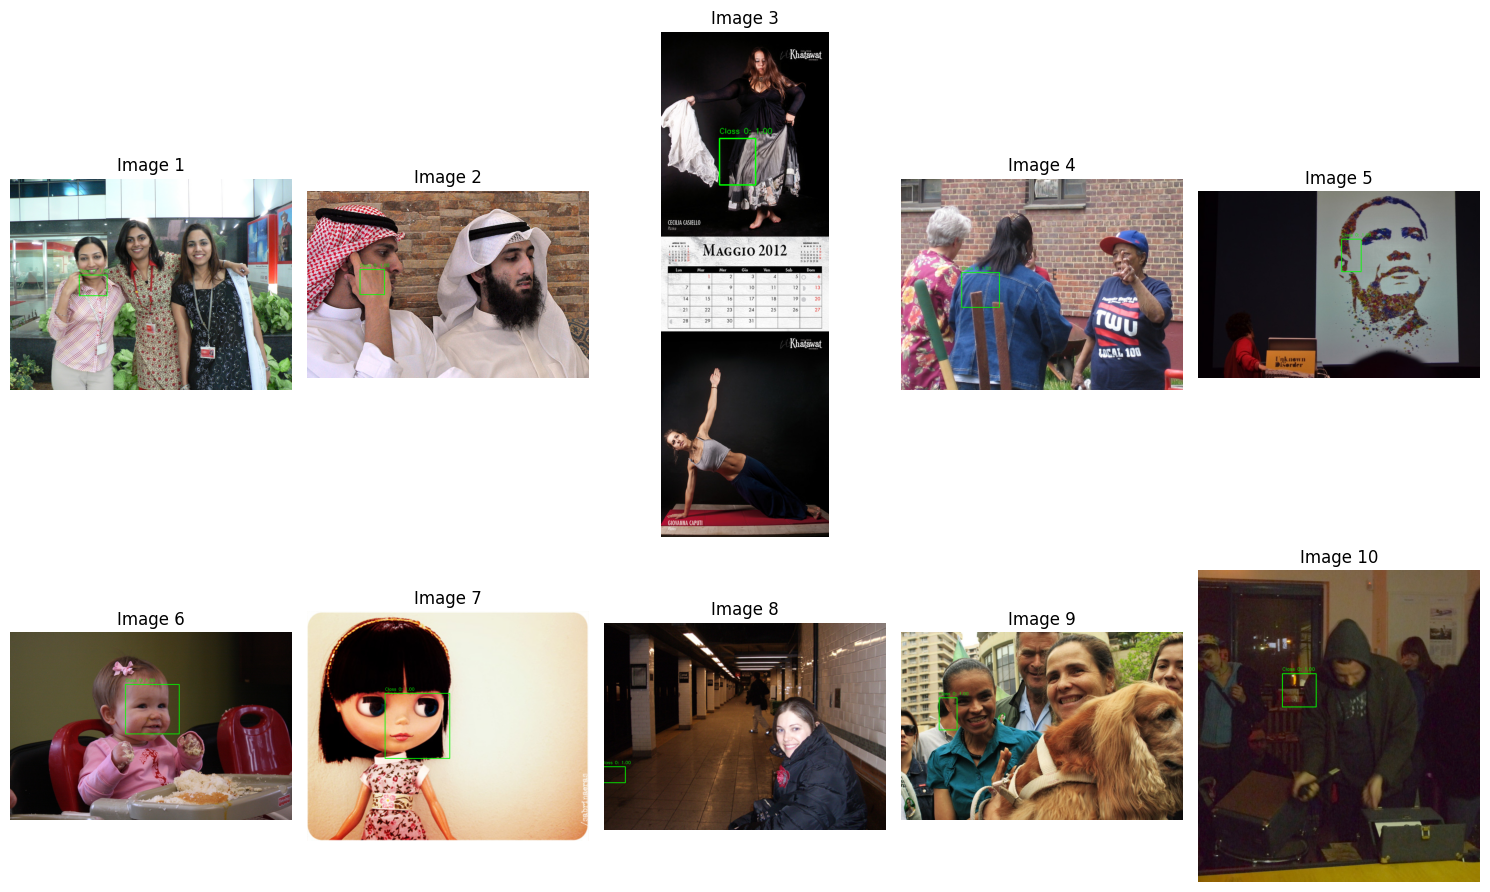

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming 'validation_image_paths' contains the paths to the original validation images (from cell f8840142)
# Assuming 'bounding_box_predictions' contains the predicted bounding box coordinates (from cell e2d2b858)
# Assuming 'classification_predictions' contains the predicted class probabilities (from cell e2d2b858)

# You might want to define a threshold for the classification confidence
confidence_threshold = 0.5 # Only draw bounding boxes for predictions with confidence above this threshold

# Define a mapping for class IDs to labels (if you have class names)
# Replace with your actual class names if available
class_labels_map = {
    0: 'Class 0',
    1: 'Class 1',
    2: 'Class 2',
    3: 'Class 3',
    4: 'Class 4',
}

plt.figure(figsize=(15, 10))

# Iterate through the first 10 validation images and their predictions
for i in range(len(validation_image_paths)):
    img_path = validation_image_paths[i]
    bbox = bounding_box_predictions[i]
    class_probs = classification_predictions[i]
    predicted_class_id = np.argmax(class_probs)
    confidence = class_probs[predicted_class_id]

    # Load the original image in color to draw bounding boxes
    img = cv2.imread(img_path)
    # Convert BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width, _ = img.shape

    # Denormalize bounding box coordinates
    # Assuming bounding box predictions are normalized (0 to 1)
    xmin = int(bbox[0] * width)
    ymin = int(bbox[1] * height)
    xmax = int(bbox[2] * width)
    ymax = int(bbox[3] * height)

    # Draw bounding box if confidence is above the threshold
    if confidence > confidence_threshold:
        # Draw rectangle (bounding box) on the image
        color = (0, 255, 0) # Green color (in BGR as OpenCV uses BGR)
        thickness = 2
        cv2.rectangle(img_rgb, (xmin, ymin), (xmax, ymax), color, thickness)

        # Put class label and confidence text near the bounding box
        label = f"{class_labels_map.get(predicted_class_id, f'Class {predicted_class_id}')}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        # Position the text slightly above the top-left corner of the bounding box
        text_x = xmin
        text_y = ymin - 10 if ymin - 10 > 10 else ymin + 10 # Adjust text position

        cv2.putText(img_rgb, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    # Display the image
    plt.subplot(2, 5, i + 1) # Adjust subplot grid as needed (e.g., 2 rows, 5 columns)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()